In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns

# загружаем данные
df = pd.read_csv('data\pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


Базовые параметры, которые необходимо передать в AgglomerativeClustering:

- n_clusters — количество кластеров; по умолчанию — 2.
- linkage — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать single, ward, average, complete; по умолчанию используется ward.

In [9]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

<Axes: xlabel='Attack', ylabel='Defense'>

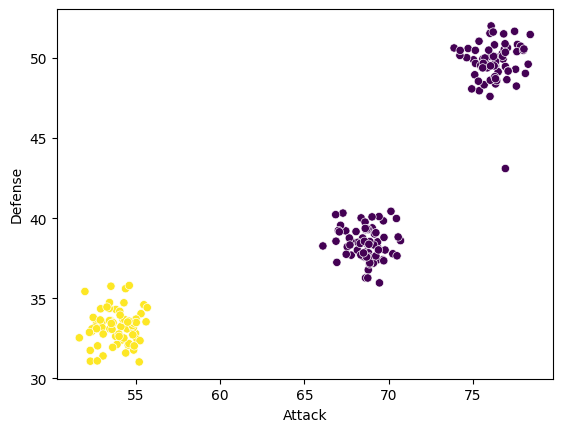

In [12]:
# ИЕРАРХИЧЕСКАЯ КЛАСТАРИЗАЦИЯ

# импортируем sklearn для кластеризации
from sklearn.cluster import AgglomerativeClustering

# инициализируем алгоритм k-means с количеством кластеров 3
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

# запустим обучение модели
agglomerative_clustering.fit(X)

# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
agglomerative_clustering.labels_
# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=agglomerative_clustering.labels_)

<Axes: xlabel='Attack', ylabel='Defense'>

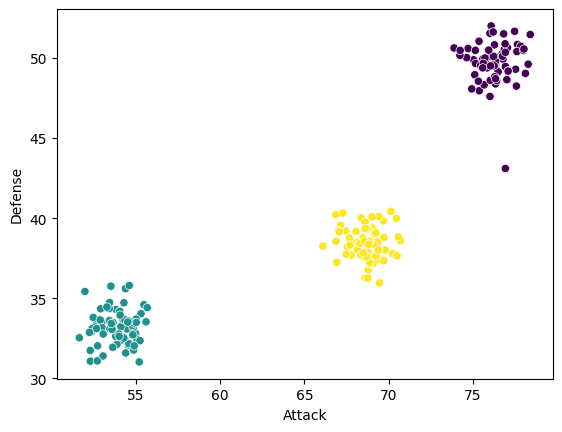

In [11]:
# EM-АЛГОРИТМЫ КЛАСТАРИЗАЦИИ

# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

- n_components — количество кластеров.
- random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

In [ ]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture)
>>> Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)

<Axes: xlabel='Attack', ylabel='Defense'>

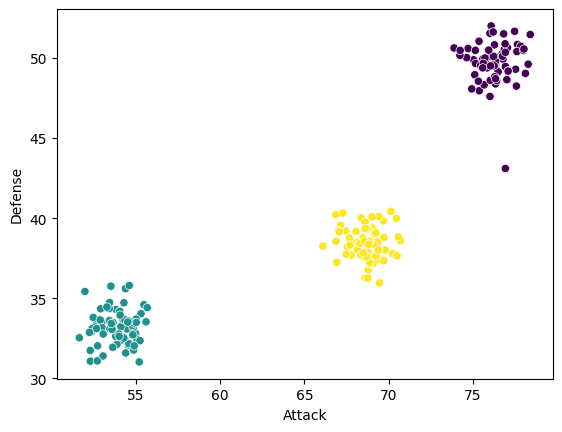

In [4]:
# СПЕКТРАЛЬНАЯ КЛАСТЕРИЗАЦИЯ

# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_
# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

Основные параметры SpectralClustering:

- n_clusters — количество кластеров; по умолчанию — 8.
- random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.

<Axes: xlabel='Attack', ylabel='Defense'>

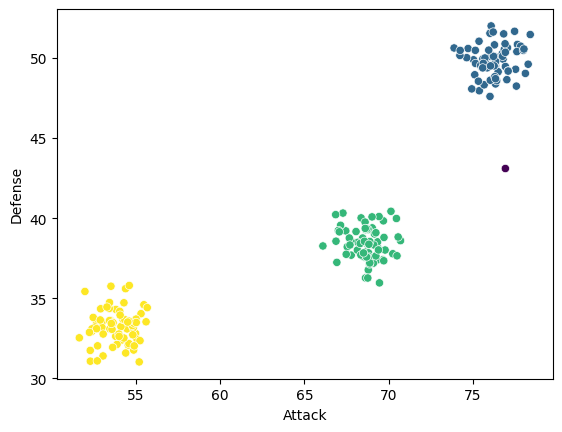

In [2]:
# DBSCAN CLUSTERING

# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

Основные параметры для запуска DBSCAN:

- eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
- min_samples — задаёт минимальное количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.